## 集成方法: ensemble method（元算法: meta algorithm） 概述

概念：是对其他算法进行组合的一种形式。

通俗来说： 当做重要决定时，大家可能都会考虑吸取多个专家而不只是一个人的意见。 机器学习处理问题时又何尝不是如此？ 这就是集成方法背后的思想。

集成方法：

* 投票选举(bagging: 自举汇聚法 bootstrap aggregating): 是基于数据随机重抽样分类器构造的方法
* 再学习(boosting): 是基于所有分类器的加权求和的方法

## 集成方法 场景

目前 bagging 方法最流行的版本是: 随机森林(random forest)  

**选男友**：美女选择择偶对象的时候，会问几个闺蜜的建议，最后选择一个综合得分最高的一个作为男朋友

目前 boosting 方法最流行的版本是: AdaBoost

**追女友**：3个帅哥追同一个美女，第1个帅哥失败->(传授经验：姓名、家庭情况) 第2个帅哥失败->(传授经验：兴趣爱好、性格特点) 第3个帅哥成功

> bagging 和 boosting 区别是什么？

bagging 是一种与 boosting 很类似的技术, 所使用的多个分类器的类型（数据量和特征量）都是一致的。

bagging 是由不同的分类器（1.数据随机化 2.特征随机化）经过训练，综合得出的出现最多分类结果；boosting 是通过调整已有分类器错分的那些数据来获得新的分类器，得出目前最优的结果。

bagging 中的分类器权重是相等的；而 boosting 中的分类器加权求和，所以权重并不相等，每个权重代表的是其对应分类器在上一轮迭代中的成功度。


## 随机森林

### 随机森林 概述

随机森林指的是利用多棵树对样本进行训练并预测的一种分类器。

决策树相当于一个大师，通过自己在数据集中学到的知识用于新数据的分类。但是俗话说得好，一个诸葛亮，玩不过三个臭皮匠。随机森林就是希望构建多个臭皮匠，希望最终的分类效果能够超过单个大师的一种算法。

### 随机森林 原理

那随机森林具体如何构建呢？  
有两个方面：

1. 数据的随机性化
2. 待选特征的随机化

使得随机森林中的决策树都能够彼此不同，提升系统的多样性，从而提升分类性能。

> 数据的随机化：使得随机森林中的决策树更普遍化一点，适合更多的场景。

（有放回的准确率在：70% 以上， 无放回的准确率在：60% 以上）

1. 采取有放回的抽样方式 构造子数据集，保证不同子集之间的数量级一样（不同子集／同一子集 之间的元素可以重复）

2. 利用子数据集来构建子决策树，将这个数据放到每个子决策树中，每个子决策树输出一个结果。

3. 然后统计子决策树的投票结果，得到最终的分类 就是 随机森林的输出结果。

4. 如下图，假设随机森林中有3棵子决策树，2棵子树的分类结果是A类，1棵子树的分类结果是B类，那么随机森林的分类结果就是A类。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537926819839_mtyQOlCjQx.jpg)


> 待选特征的随机化

1. 子树从所有的待选特征中随机选取一定的特征。
2. 在选取的特征中选取最优的特征。
 
下图中，蓝色的方块代表所有可以被选择的特征，也就是目前的待选特征；黄色的方块是分裂特征。

左边是一棵决策树的特征选取过程，通过在待选特征中选取最优的分裂特征（别忘了前文提到的ID3算法，C4.5算法，CART算法等等），完成分裂。

右边是一个随机森林中的子树的特征选取过程。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537926883534_9Ay9BwF7V5.jpg)

> 随机森林 开发流程

* 收集数据：任何方法
* 准备数据：转换样本集
* 分析数据：任何方法
* 训练算法：通过数据随机化和特征随机化，进行多实例的分类评估
* 测试算法：计算错误率
* 使用算法：输入样本数据，然后运行 随机森林 算法判断输入数据分类属于哪个分类，最后对计算出的分类执行后续处理

> 随机森林 算法特点

* 优点：几乎不需要输入准备、可实现隐式特征选择、训练速度非常快、其他模型很难超越、很难建立一个糟糕的随机森林模型、大量优秀、免费以及开源的实现。
* 缺点：劣势在于模型大小、是个很难去解释的黑盒子。
* 适用数据范围：数值型和标称型

## 项目案例: 声纳信号分类

**项目概述**

这是 Gorman 和 Sejnowski 在研究使用神经网络的声纳信号分类中使用的数据集。任务是训练一个模型来区分声纳信号。

**开发流程**

* 收集数据：提供的文本文件
* 准备数据：转换样本集
* 分析数据：手工检查数据
* 训练算法：在数据上，利用 random_forest() 函数进行优化评估，返回模型的综合分类结果
* 测试算法：在采用自定义 n_folds 份随机重抽样 进行测试评估，得出综合的预测评分
* 使用算法：若你感兴趣可以构建完整的应用程序，从案例进行封装，也可以参考我们的代码

> 收集数据：提供的文本文件

样本数据：sonar-all-data.txt

```
0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.325,0.32,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.184,0.197,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.053,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,0.6333,0.706,0.5544,0.532,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.507,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.013,0.0106,0.0033,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,R
```

> 准备数据：转换样本集



In [2]:
# 导入csv文件
def loadDataSet(filename):
    dataset = []
    with open(filename, 'r') as fr:
        for line in fr.readlines():
            if not line:
                continue
            lineArr = []
            for featrue in line.split(','):
                # strip()返回移除字符串头尾指定的字符生成的新字符串
                str_f = featrue.strip()
                if (str_f.isdigit()): # 判断是否是数字
                    # 将数据集的第column列转换成float形式
                    lineArr.append(float(str_f))
                else:
                    # 添加分类标签
                    lineArr.append(str_f)
            dataset.append(lineArr)
    return dataset


> 分析数据：手工检查数据

> 训练算法：在数据上，利用 random_forest() 函数进行优化评估，返回模型的综合分类结果

**样本数据随机无放回抽样-用于交叉验证** 




In [3]:
def cross_validation_split(dataset, n_folds):
    """cross_validation_split(将数据集进行抽重抽样 n_folds 份，数据可以重复抽取)

    Args:
        dataset     原始数据集
        n_folds     数据集dataset分成n_flods份
    Returns:
        dataset_split    list集合，存放的是：将数据集进行抽重抽样 n_folds 份，数据可以重复抽取
    """
    dataset_split = list()
    dataset_copy = list(dataset)       # 复制一份 dataset,防止 dataset 的内容改变
    fold_size = len(dataset) / n_folds
    for i in range(n_folds):
        fold = list()                  # 每次循环 fold 清零，防止重复导入 dataset_split
        while len(fold) < fold_size:   # 这里不能用 if，if 只是在第一次判断时起作用，while 执行循环，直到条件不成立
            # 有放回的随机采样，有一些样本被重复采样，从而在训练集中多次出现，有的则从未在训练集中出现，此为自助采样法。从而保证每棵决策树训练集的差异性            
            index = randrange(len(dataset_copy))
            # 将对应索引 index 的内容从 dataset_copy 中导出，并将该内容从 dataset_copy 中删除。
            # pop() 函数用于移除列表中的一个元素（默认最后一个元素），并且返回该元素的值。
            fold.append(dataset_copy.pop(index))  # 无放回的方式
            # fold.append(dataset_copy[index])  # 有放回的方式
        dataset_split.append(fold)
    # 由dataset分割出的n_folds个数据构成的列表，为了用于交叉验证
    return dataset_split

> 训练数据集随机化


In [4]:
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):   # 创建数据集的随机子样本
    """random_forest(评估算法性能，返回模型得分)

    Args:
        dataset         训练数据集
        ratio           训练数据集的样本比例
    Returns:
        sample          随机抽样的训练样本
    """

    sample = list()
    # 训练样本的按比例抽样。
    # round() 方法返回浮点数x的四舍五入值。
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        # 有放回的随机采样，有一些样本被重复采样，从而在训练集中多次出现，有的则从未在训练集中出现，此为自助采样法。从而保证每棵决策树训练集的差异性
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample

> 特征随机化


In [5]:
# 找出分割数据集的最优特征，得到最优的特征 index，特征值 row[index]，以及分割完的数据 groups（left, right）
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))  # class_values =[0, 1]
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)  # 往 features 添加 n_features 个特征（ n_feature 等于特征数的个数），特征索引从 dataset 中随机取
        if index not in features:
            features.append(index)
    for index in features:                    # 在 n_features 个特征中选出最优的特征索引，并没有遍历所有特征，从而保证了每课决策树的差异性
        for row in dataset:
            groups = test_split(index, row[index], dataset)  # groups=(left, right), row[index] 遍历每一行 index 索引下的特征值作为分类值 value, 找出最优的分类特征和特征值
            gini = gini_index(groups, class_values)
            # 左右两边的数量越一样，说明数据区分度不高，gini系数越大
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups  # 最后得到最优的分类特征 b_index,分类特征值 b_value,分类结果 b_groups。b_value 为分错的代价成本
    # print b_score
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

> 随机森林

In [6]:
# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    """random_forest(评估算法性能，返回模型得分)

    Args:
        train           训练数据集
        test            测试数据集
        max_depth       决策树深度不能太深，不然容易导致过拟合
        min_size        叶子节点的大小
        sample_size     训练数据集的样本比例
        n_trees         决策树的个数
        n_features      选取的特征的个数
    Returns:
        predictions     每一行的预测结果，bagging 预测最后的分类结果
    """

    trees = list()
    # n_trees 表示决策树的数量
    for i in range(n_trees):
        # 随机抽样的训练样本， 随机采样保证了每棵决策树训练集的差异性
        sample = subsample(train, sample_size)
        # 创建一个决策树
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)

    # 每一行的预测结果，bagging 预测最后的分类结果
    predictions = [bagging_predict(trees, row) for row in test]
    return predictions


> 测试算法：在采用自定义 n_folds 份随机重抽样 进行测试评估，得出综合的预测评分。

* 计算随机森林的预测结果的正确率

In [7]:
# 评估算法性能，返回模型得分
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    """evaluate_algorithm(评估算法性能，返回模型得分)

    Args:
        dataset     原始数据集
        algorithm   使用的算法
        n_folds     数据的份数
        *args       其他的参数
    Returns:
        scores      模型得分
    """

    # 将数据集进行随机抽样，分成 n_folds 份，数据无重复的抽取
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    # 每次循环从 folds 从取出一个 fold 作为测试集，其余作为训练集，遍历整个 folds ，实现交叉验证
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        # 将多个 fold 列表组合成一个 train_set 列表, 类似 union all
        """
        In [20]: l1=[[1, 2, 'a'], [11, 22, 'b']]
        In [21]: l2=[[3, 4, 'c'], [33, 44, 'd']]
        In [22]: l=[]
        In [23]: l.append(l1)
        In [24]: l.append(l2)
        In [25]: l
        Out[25]: [[[1, 2, 'a'], [11, 22, 'b']], [[3, 4, 'c'], [33, 44, 'd']]]
        In [26]: sum(l, [])
        Out[26]: [[1, 2, 'a'], [11, 22, 'b'], [3, 4, 'c'], [33, 44, 'd']]
        """
        train_set = sum(train_set, [])
        test_set = list()
        # fold 表示从原始数据集 dataset 提取出来的测试集
        for row in fold:
            row_copy = list(row)
            row_copy[-1] = None 
            test_set.append(row_copy)
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]

        # 计算随机森林的预测结果的正确率
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores


In [8]:
#项目1 完整代码
#!/usr/bin/python
# coding:utf8

'''
Created 2017-04-25
Update  on 2017-05-18
Random Forest Algorithm on Sonar Dataset
@author: Flying_sfeng/片刻
《机器学习实战》更新地址：https://github.com/apachecn/MachineLearning
---
源代码网址：http://www.tuicool.com/articles/iiUfeim
Flying_sfeng博客地址：http://blog.csdn.net/flying_sfeng/article/details/64133822
在此表示感谢你的代码和注解， 我重新也完善了个人注解
'''
from random import seed, randrange, random


# 导入csv文件
def loadDataSet(filename):
    dataset = []
    with open(filename, 'r') as fr:
        for line in fr.readlines():
            if not line:
                continue
            lineArr = []
            for featrue in line.split(','):
                # strip()返回移除字符串头尾指定的字符生成的新字符串
                str_f = featrue.strip()
                # isdigit 如果是浮点型数值，就是 false，所以换成 isalpha() 函数
                # if str_f.isdigit():   # 判断是否是数字
                if str_f.isalpha():     # 如果是字母，说明是标签
                    # 添加分类标签
                    lineArr.append(str_f)
                else:
                    # 将数据集的第column列转换成float形式
                    lineArr.append(float(str_f))
            dataset.append(lineArr)
    return dataset


def cross_validation_split(dataset, n_folds):
    """cross_validation_split(将数据集进行抽重抽样 n_folds 份，数据可以重复重复抽取，每一次list的元素是无重复的)

    Args:
        dataset     原始数据集
        n_folds     数据集dataset分成n_flods份
    Returns:
        dataset_split    list集合，存放的是：将数据集进行抽重抽样 n_folds 份，数据可以重复重复抽取，每一次list的元素是无重复的
    """
    dataset_split = list()
    dataset_copy = list(dataset)       # 复制一份 dataset,防止 dataset 的内容改变
    fold_size = len(dataset) / n_folds
    for i in range(n_folds):
        fold = list()                  # 每次循环 fold 清零，防止重复导入 dataset_split
        while len(fold) < fold_size:   # 这里不能用 if，if 只是在第一次判断时起作用，while 执行循环，直到条件不成立
            # 有放回的随机采样，有一些样本被重复采样，从而在训练集中多次出现，有的则从未在训练集中出现，此则自助采样法。从而保证每棵决策树训练集的差异性            
            index = randrange(len(dataset_copy))
            # 将对应索引 index 的内容从 dataset_copy 中导出，并将该内容从 dataset_copy 中删除。
            # pop() 函数用于移除列表中的一个元素（默认最后一个元素），并且返回该元素的值。
            # fold.append(dataset_copy.pop(index))  # 无放回的方式
            fold.append(dataset_copy[index])  # 有放回的方式
        dataset_split.append(fold)
    # 由dataset分割出的n_folds个数据构成的列表，为了用于交叉验证
    return dataset_split


# Split a dataset based on an attribute and an attribute value # 根据特征和特征值分割数据集
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right


# Calculate the Gini index for a split dataset
def gini_index(groups, class_values):    # 个人理解：计算代价，分类越准确，则 gini 越小
    gini = 0.0
    for class_value in class_values:     # class_values = [0, 1] 
        for group in groups:             # groups = (left, right)
            size = len(group)
            if size == 0:
                continue
            proportion = [row[-1] for row in group].count(class_value) / float(size)
            gini += (proportion * (1.0 - proportion))    # 个人理解：计算代价，分类越准确，则 gini 越小
    return gini


# 找出分割数据集的最优特征，得到最优的特征 index，特征值 row[index]，以及分割完的数据 groups（left, right）
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))  # class_values =[0, 1]
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)  # 往 features 添加 n_features 个特征（ n_feature 等于特征数的根号），特征索引从 dataset 中随机取
        if index not in features:
            features.append(index)
    for index in features:                    # 在 n_features 个特征中选出最优的特征索引，并没有遍历所有特征，从而保证了每课决策树的差异性
        for row in dataset:
            groups = test_split(index, row[index], dataset)  # groups=(left, right), row[index] 遍历每一行 index 索引下的特征值作为分类值 value, 找出最优的分类特征和特征值
            gini = gini_index(groups, class_values)
            # 左右两边的数量越一样，说明数据区分度不高，gini系数越大
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups  # 最后得到最优的分类特征 b_index,分类特征值 b_value,分类结果 b_groups。b_value 为分错的代价成本
    # print(b_score)
    return {'index': b_index, 'value': b_value, 'groups': b_groups}


# Create a terminal node value # 输出group中出现次数较多的标签
def to_terminal(group):
    outcomes = [row[-1] for row in group]           # max() 函数中，当 key 参数不为空时，就以 key 的函数对象为判断的标准
    return max(set(outcomes), key=outcomes.count)   # 输出 group 中出现次数较多的标签  


# Create child splits for a node or make terminal  # 创建子分割器，递归分类，直到分类结束
def split(node, max_depth, min_size, n_features, depth):  # max_depth = 10, min_size = 1, n_features = int(sqrt((dataset[0])-1))
    left, right = node['groups']
    del(node['groups'])
# check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
# check for max depth
    if depth >= max_depth:   # max_depth=10 表示递归十次，若分类还未结束，则选取数据中分类标签较多的作为结果，使分类提前结束，防止过拟合
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
# process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)  # node['left']是一个字典，形式为{'index':b_index, 'value':b_value, 'groups':b_groups}，所以node是一个多层字典
        split(node['left'], max_depth, min_size, n_features, depth+1)  # 递归，depth+1计算递归层数
# process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)


# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    """build_tree(创建一个决策树)

    Args:
        train           训练数据集
        max_depth       决策树深度不能太深，不然容易导致过拟合
        min_size        叶子节点的大小
        n_features      选取的特征的个数
    Returns:
        root            返回决策树
    """

    # 返回最优列和相关的信息
    root = get_split(train, n_features)

    # 对左右2边的数据 进行递归的调用，由于最优特征使用过，所以在后面进行使用的时候，就没有意义了
    # 例如： 性别-男女，对男使用这一特征就没任何意义了
    split(root, max_depth, min_size, n_features, 1)
    return root


# Make a prediction with a decision tree
def predict(node, row):   # 预测模型分类结果
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):       # isinstance 是 Python 中的一个内建函数。是用来判断一个对象是否是一个已知的类型。
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    """bagging_predict(bagging预测)

    Args:
        trees           决策树的集合
        row             测试数据集的每一行数据
    Returns:
        返回随机森林中，决策树结果出现次数做大的
    """

    # 使用多个决策树trees对测试集test的第row行进行预测，再使用简单投票法判断出该行所属分类
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)


# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):   # 创建数据集的随机子样本
    """random_forest(评估算法性能，返回模型得分)

    Args:
        dataset         训练数据集
        ratio           训练数据集的样本比例
    Returns:
        sample          随机抽样的训练样本
    """

    sample = list()
    # 训练样本的按比例抽样。
    # round() 方法返回浮点数x的四舍五入值。
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        # 有放回的随机采样，有一些样本被重复采样，从而在训练集中多次出现，有的则从未在训练集中出现，此则自助采样法。从而保证每棵决策树训练集的差异性
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample


# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    """random_forest(评估算法性能，返回模型得分)

    Args:
        train           训练数据集
        test            测试数据集
        max_depth       决策树深度不能太深，不然容易导致过拟合
        min_size        叶子节点的大小
        sample_size     训练数据集的样本比例
        n_trees         决策树的个数
        n_features      选取的特征的个数
    Returns:
        predictions     每一行的预测结果，bagging 预测最后的分类结果
    """

    trees = list()
    # n_trees 表示决策树的数量
    for i in range(n_trees):
        # 随机抽样的训练样本， 随机采样保证了每棵决策树训练集的差异性
        sample = subsample(train, sample_size)
        # 创建一个决策树
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)

    # 每一行的预测结果，bagging 预测最后的分类结果
    predictions = [bagging_predict(trees, row) for row in test]
    return predictions


# Calculate accuracy percentage
def accuracy_metric(actual, predicted):  # 导入实际值和预测值，计算精确度
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


# 评估算法性能，返回模型得分
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    """evaluate_algorithm(评估算法性能，返回模型得分)

    Args:
        dataset     原始数据集
        algorithm   使用的算法
        n_folds     数据的份数
        *args       其他的参数
    Returns:
        scores      模型得分
    """

    # 将数据集进行抽重抽样 n_folds 份，数据可以重复重复抽取，每一次 list 的元素是无重复的
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    # 每次循环从 folds 从取出一个 fold 作为测试集，其余作为训练集，遍历整个 folds ，实现交叉验证
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        # 将多个 fold 列表组合成一个 train_set 列表, 类似 union all
        """
        In [20]: l1=[[1, 2, 'a'], [11, 22, 'b']]
        In [21]: l2=[[3, 4, 'c'], [33, 44, 'd']]
        In [22]: l=[]
        In [23]: l.append(l1)
        In [24]: l.append(l2)
        In [25]: l
        Out[25]: [[[1, 2, 'a'], [11, 22, 'b']], [[3, 4, 'c'], [33, 44, 'd']]]
        In [26]: sum(l, [])
        Out[26]: [[1, 2, 'a'], [11, 22, 'b'], [3, 4, 'c'], [33, 44, 'd']]
        """
        train_set = sum(train_set, [])
        test_set = list()
        # fold 表示从原始数据集 dataset 提取出来的测试集
        for row in fold:
            row_copy = list(row)
            row_copy[-1] = None
            test_set.append(row_copy)
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]

        # 计算随机森林的预测结果的正确率
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores


if __name__ == '__main__':

    # 加载数据
    dataset = loadDataSet('./dataset/sonar-all-data.txt')
    # print(dataset)

    n_folds = 5        # 分成5份数据，进行交叉验证
    max_depth = 20     # 调参（自己修改） #决策树深度不能太深，不然容易导致过拟合
    min_size = 1       # 决策树的叶子节点最少的元素数量
    sample_size = 1.0  # 做决策树时候的样本的比例
    # n_features = int((len(dataset[0])-1))
    n_features = 15     # 调参（自己修改） #准确性与多样性之间的权衡
    for n_trees in [1, 10, 20]:  # 理论上树是越多越好
        scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
        # 每一次执行本文件时都能产生同一个随机数
        seed(1)
        print('random=', random())
        print('Trees: %d' % n_trees)
        print('Scores: %s' % scores)
        print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


random= 0.13436424411240122
Trees: 1
Scores: [71.42857142857143, 69.04761904761905, 78.57142857142857, 73.80952380952381, 69.04761904761905]
Mean Accuracy: 72.381%
random= 0.13436424411240122
Trees: 10
Scores: [78.57142857142857, 78.57142857142857, 78.57142857142857, 78.57142857142857, 73.80952380952381]
Mean Accuracy: 77.619%
random= 0.13436424411240122
Trees: 20
Scores: [78.57142857142857, 80.95238095238095, 78.57142857142857, 78.57142857142857, 73.80952380952381]
Mean Accuracy: 78.095%


## AdaBoost

### AdaBoost (adaptive boosting: 自适应 boosting) 概述

能否使用弱分类器和多个实例来构建一个强分类器？ 这是一个非常有趣的理论问题。

### AdaBoost 原理

> AdaBoost 工作原理

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537955607545_P9WpLY4wCk.jpg)

> AdaBoost 开发流程

* 收集数据：可以使用任意方法
* 准备数据：依赖于所使用的弱分类器类型，本章使用的是单层决策树，这种分类器可以处理任何数据类型。  
    当然也可以使用任意分类器作为弱分类器，第2章到第6章中的任一分类器都可以充当弱分类器。  
    作为弱分类器，简单分类器的效果更好。
* 分析数据：可以使用任意方法。
* 训练算法：AdaBoost 的大部分时间都用在训练上，分类器将多次在同一数据集上训练弱分类器。
* 测试算法：计算分类的错误率。
* 使用算法：通SVM一样，AdaBoost 预测两个类别中的一个。如果想把它应用到多个类别的场景，那么就要像多类 SVM 中的做法一样对 AdaBoost 进行修改。

> AdaBoost 算法特点

* 优点：泛化（由具体的、个别的扩大为一般的）错误率低，易编码，可以应用在大部分分类器上，无参数调节。
* 缺点：对离群点敏感。
* 适用数据类型：数值型和标称型数据。

### 项目案例: 马疝病的预测

**项目流程图**

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537955758645_xSl5VdESHD.jpg)

**基于单层决策树构建弱分类器**

单层决策树(decision stump, 也称决策树桩)是一种简单的决策树。

**项目概述**

预测患有疝气病的马的存活问题，这里的数据包括368个样本和28个特征，疝气病是描述马胃肠痛的术语，然而，这种病并不一定源自马的胃肠问题，其他问题也可能引发疝气病，该数据集中包含了医院检测马疝气病的一些指标，有的指标比较主观，有的指标难以测量，例如马的疼痛级别。另外，除了部分指标主观和难以测量之外，该数据还存在一个问题，数据集中有30%的值是缺失的。

**开发流程** 

* 收集数据：提供的文本文件
* 准备数据：确保类别标签是+1和-1，而非1和0
* 分析数据：统计分析
* 训练算法：在数据上，利用 adaBoostTrainDS() 函数训练出一系列的分类器
* 测试算法：我们拥有两个数据集。在不采用随机抽样的方法下，我们就会对 AdaBoost 和 Logistic 回归的结果进行完全对等的比较
* 使用算法：观察该例子上的错误率。不过，也可以构建一个 Web 网站，让驯马师输入马的症状然后预测马是否会死去

> 收集数据：提供的文本文件

训练数据：horseColicTraining.txt
测试数据：horseColicTest.txt

```
2.000000	1.000000	38.500000	66.000000	28.000000	3.000000	3.000000	0.000000	2.000000	5.000000	4.000000	4.000000	0.000000	0.000000	0.000000	3.000000	5.000000	45.000000	8.400000	0.000000	0.000000	-1.000000
1.000000	1.000000	39.200000	88.000000	20.000000	0.000000	0.000000	4.000000	1.000000	3.000000	4.000000	2.000000	0.000000	0.000000	0.000000	4.000000	2.000000	50.000000	85.000000	2.000000	2.000000	-1.000000
2.000000	1.000000	38.300000	40.000000	24.000000	1.000000	1.000000	3.000000	1.000000	3.000000	3.000000	1.000000	0.000000	0.000000	0.000000	1.000000	1.000000	33.000000	6.700000	0.000000	0.000000	1.000000
```

> 准备数据：确保类别标签是+1和-1，而非1和0

In [9]:
def loadDataSet(fileName):
    # 获取 feature 的数量, 便于获取
    numFeat = len(open(fileName).readline().split('\t'))
    dataArr = []
    labelArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        labelArr.append(float(curLine[-1]))
    return dataArr, labelArr

> 分析数据：统计分析

过拟合(overfitting, 也称为过学习)

发现测试错误率在达到一个最小值之后有开始上升，这种现象称为过拟合。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537955963675_JH9KECF6Sr.jpg)

通俗来说：就是把一些噪音数据也拟合进去的，如下图。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537955978008_WSZktltK4p.jpg)



> 训练算法：在数据上，利用 adaBoostTrainDS() 函数训练出一系列的分类器

In [12]:
def adaBoostTrainDS(dataArr, labelArr, numIt=40):
    """adaBoostTrainDS(adaBoost训练过程放大)
    Args:
        dataArr   特征标签集合
        labelArr  分类标签集合
        numIt     实例数
    Returns:
        weakClassArr  弱分类器的集合
        aggClassEst   预测的分类结果值
    """
    weakClassArr = []
    m = shape(dataArr)[0]
    # 初始化 D，设置每个样本的权重值，平均分为m份
    D = mat(ones((m, 1))/m)
    aggClassEst = mat(zeros((m, 1)))
    for i in range(numIt):
        # 得到决策树的模型
        bestStump, error, classEst = buildStump(dataArr, labelArr, D)

        # alpha目的主要是计算每一个分类器实例的权重(组合就是分类结果)
        # 计算每个分类器的alpha权重值
        alpha = float(0.5*log((1.0-error)/max(error, 1e-16)))
        bestStump['alpha'] = alpha
        # store Stump Params in Array
        weakClassArr.append(bestStump)

        print ("alpha=%s, classEst=%s, bestStump=%s, error=%s " % (alpha, classEst.T, bestStump, error))
        # 分类正确：乘积为1，不会影响结果，-1主要是下面求e的-alpha次方
        # 分类错误：乘积为 -1，结果会受影响，所以也乘以 -1
        expon = multiply(-1*alpha*mat(labelArr).T, classEst)
        print ('(-1取反)预测值expon=', expon.T)
        # 计算e的expon次方，然后计算得到一个综合的概率的值
        # 结果发现： 判断错误的样本，D中相对应的样本权重值会变大。
        D = multiply(D, exp(expon))
        D = D/D.sum()

        # 预测的分类结果值，在上一轮结果的基础上，进行加和操作
        print ('当前的分类结果：', alpha*classEst.T)
        aggClassEst += alpha*classEst
        print ("叠加后的分类结果aggClassEst: ", aggClassEst.T)
        # sign 判断正为1， 0为0， 负为-1，通过最终加和的权重值，判断符号。
        # 结果为：错误的样本标签集合，因为是 !=,那么结果就是0 正, 1 负
        aggErrors = multiply(sign(aggClassEst) != mat(labelArr).T, ones((m, 1)))
        errorRate = aggErrors.sum()/m
        # print "total error=%s " % (errorRate)
        if errorRate == 0.0:
            break
    return weakClassArr, aggClassEst

发现：
alpha （模型权重）目的主要是计算每一个分类器实例的权重(加和就是分类结果)

  分类的权重值：最大的值= alpha 的加和，最小值=-最大值
D （样本权重）的目的是为了计算错误概率： weightedError = D.T*errArr，求最佳分类器

样本的权重值：如果一个值误判的几率越小，那么 D 的样本权重越小

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1537956113153_NfumwYjHZQ.jpg)

> 测试算法：我们拥有两个数据集。在不采用随机抽样的方法下，我们就会对 AdaBoost 和 Logistic 回归的结果进行完全对等的比较。

In [13]:
def adaClassify(datToClass, classifierArr):
    """adaClassify(ada分类测试)
    Args:
        datToClass     多个待分类的样例
        classifierArr  弱分类器的集合
    Returns:
        sign(aggClassEst) 分类结果
    """
    # do stuff similar to last aggClassEst in adaBoostTrainDS
    dataMat = mat(datToClass)
    m = shape(dataMat)[0]
    aggClassEst = mat(zeros((m, 1)))

    # 循环 多个分类器
    for i in range(len(classifierArr)):
        # 前提： 我们已经知道了最佳的分类器的实例
        # 通过分类器来核算每一次的分类结果，然后通过alpha*每一次的结果 得到最后的权重加和的值。
        classEst = stumpClassify(dataMat, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
    return sign(aggClassEst)

> 使用算法：观察该例子上的错误率。不过，也可以构建一个 Web 网站，让驯马师输入马的症状然后预测马是否会死去。

In [14]:

def test():
    # D = np.mat(np.ones((5, 1)) / 5)
    # data_mat, class_labels = load_sim_data()
    # print(data_mat.shape)
    # result = build_stump(data_mat, class_labels, D)
    # print(result)
    # classifier_array, agg_class_est = ada_boost_train_ds(data_mat, class_labels, 9)
    # print(classifier_array, agg_class_est)
    data_mat, class_labels = load_data_set('./dataset/horseColicTraining2.txt')
    print(data_mat.shape, len(class_labels))
    weak_class_arr, agg_class_est = ada_boost_train_ds(data_mat, class_labels, 40)
    print(weak_class_arr, '\n-----\n', agg_class_est.T)
    plot_roc(agg_class_est, class_labels)
    data_arr_test, label_arr_test = load_data_set("./dataset/horseColicTest2.txt")
    m = np.shape(data_arr_test)[0]
    predicting10 = ada_classify(data_arr_test, weak_class_arr)
    err_arr = np.mat(np.ones((m, 1)))
    # 测试：计算总样本数，错误样本数，错误率
    print(m,
          err_arr[predicting10 != np.mat(label_arr_test).T].sum(),
          err_arr[predicting10 != np.mat(label_arr_test).T].sum() / m
          )


(299, 21) 299
[{'dim': 9, 'thresh': 3.0, 'ineq': 'gt', 'alpha': 0.4616623792657674}, {'dim': 17, 'thresh': 52.5, 'ineq': 'gt', 'alpha': 0.31248245042467104}, {'dim': 3, 'thresh': 55.199999999999996, 'ineq': 'gt', 'alpha': 0.2868097320169577}, {'dim': 18, 'thresh': 62.300000000000004, 'ineq': 'lt', 'alpha': 0.23297004638939506}, {'dim': 10, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.19803846151213741}, {'dim': 5, 'thresh': 2.0, 'ineq': 'gt', 'alpha': 0.18847887349020634}, {'dim': 12, 'thresh': 1.2, 'ineq': 'lt', 'alpha': 0.15227368997476778}, {'dim': 7, 'thresh': 1.2, 'ineq': 'gt', 'alpha': 0.15510870821690512}, {'dim': 5, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.13536197353359405}, {'dim': 4, 'thresh': 28.799999999999997, 'ineq': 'lt', 'alpha': 0.12521587326132078}, {'dim': 11, 'thresh': 2.0, 'ineq': 'gt', 'alpha': 0.1334764812820767}, {'dim': 9, 'thresh': 4.0, 'ineq': 'lt', 'alpha': 0.1418224325377107}, {'dim': 14, 'thresh': 0.0, 'ineq': 'gt', 'alpha': 0.10264268449708028}, {'dim': 0, 'th

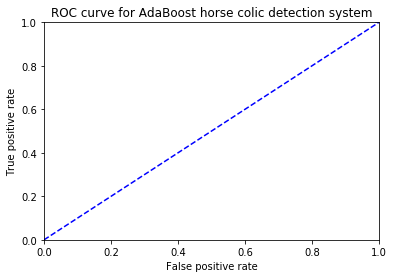

the Area Under the Curve is:  0.008264462809917356
67 13.0 0.19402985074626866


In [15]:
#!/usr/bin/python
# coding:utf8

import numpy as np
%matplotlib inline


def load_sim_data():
    """
    测试数据，
    :return: data_arr   feature对应的数据集
            label_arr  feature对应的分类标签
    """
    data_mat = np.matrix([[1.0, 2.1],
                          [2.0, 1.1],
                          [1.3, 1.0],
                          [1.0, 1.0],
                          [2.0, 1.0]])
    class_labels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return data_mat, class_labels


def load_data_set(file_name):
    """
    加载马的疝气病的数据
    :param file_name: 文件名
    :return: 必须要是np.array或者np.matrix不然后面没有，shape
    """
    num_feat = len(open(file_name).readline().split('\t'))
    data_arr = []
    label_arr = []
    fr = open(file_name)
    for line in fr.readlines():
        line_arr = []
        cur_line = line.strip().split('\t')
        for i in range(num_feat - 1):
            line_arr.append(float(cur_line[i]))
        data_arr.append(line_arr)
        label_arr.append(float(cur_line[-1]))
    return np.matrix(data_arr), label_arr


def stump_classify(data_mat, dimen, thresh_val, thresh_ineq):
    """
    (将数据集，按照feature列的value进行 二分法切分比较来赋值分类)
    :param data_mat: Matrix数据集
    :param dimen: 特征的哪一个列
    :param thresh_val: 特征列要比较的值
    :param thresh_ineq: 
    :return: np.array
    """
    ret_array = np.ones((np.shape(data_mat)[0], 1))
    # data_mat[:, dimen] 表示数据集中第dimen列的所有值
    # thresh_ineq == 'lt'表示修改左边的值，gt表示修改右边的值
    # （这里其实我建议理解为转换左右边，就是一棵树的左右孩子，可能有点问题。。。待考证）
    if thresh_ineq == 'lt':
        ret_array[data_mat[:, dimen] <= thresh_val] = -1.0
    else:
        ret_array[data_mat[:, dimen] > thresh_val] = -1.0
    return ret_array


def build_stump(data_arr, class_labels, D):
    """
    得到决策树的模型 (这个比较重要，需要看懂）
    :param data_arr: 特征标签集合
    :param class_labels: 分类标签集合
    :param D: 最初的特征权重值
    :return: bestStump    最优的分类器模型
            min_error     错误率
            best_class_est  训练后的结果集
    """
    data_mat = np.mat(data_arr)
    label_mat = np.mat(class_labels).T

    m, n = np.shape(data_mat)
    num_steps = 10.0
    best_stump = {}
    best_class_est = np.mat(np.zeros((m, 1)))
    # 无穷大
    min_err = np.inf
    for i in range(n):
        range_min = data_mat[:, i].min()
        range_max = data_mat[:, i].max()
        step_size = (range_max - range_min) / num_steps
        for j in range(-1, int(num_steps) + 1):
            for inequal in ['lt', 'gt']:
                thresh_val = (range_min + float(j) * step_size)
                predicted_vals = stump_classify(data_mat, i, thresh_val, inequal)
                err_arr = np.mat(np.ones((m, 1)))
                err_arr[predicted_vals == label_mat] = 0
                # 这里是矩阵乘法
                weighted_err = D.T * err_arr
                '''
                dim            表示 feature列
                thresh_val      表示树的分界值
                inequal        表示计算树左右颠倒的错误率的情况
                weighted_error  表示整体结果的错误率
                best_class_est    预测的最优结果 （与class_labels对应）
                '''
                # print('split: dim {}, thresh {}, thresh inequal: {}, the weighted err is {}'.format(
                #     i, thresh_val, inequal, weighted_err
                # ))
                if weighted_err < min_err:
                    min_err = weighted_err
                    best_class_est = predicted_vals.copy()
                    best_stump['dim'] = i
                    best_stump['thresh'] = thresh_val
                    best_stump['ineq'] = inequal
    # best_stump 表示分类器的结果，在第几个列上，用大于／小于比较，阈值是多少 (单个弱分类器)
    return best_stump, min_err, best_class_est


def ada_boost_train_ds(data_arr, class_labels, num_it=40):
    """
    adaBoost训练过程放大
    :param data_arr: 特征标签集合
    :param class_labels: 分类标签集合
    :param num_it: 迭代次数
    :return: weak_class_arr  弱分类器的集合
            agg_class_est   预测的分类结果值
    """
    weak_class_arr = []
    m = np.shape(data_arr)[0]
    # 初始化 D，设置每个特征的权重值，平均分为m份
    D = np.mat(np.ones((m, 1)) / m)
    agg_class_est = np.mat(np.zeros((m, 1)))
    for i in range(num_it):
        # 得到决策树的模型
        best_stump, error, class_est = build_stump(data_arr, class_labels, D)
        # print('D: {}'.format(D.T))
        # alpha 目的主要是计算每一个分类器实例的权重(加和就是分类结果)
        # 计算每个分类器的 alpha 权重值
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))
        best_stump['alpha'] = alpha
        # store Stump Params in Array
        weak_class_arr.append(best_stump)
        # print('class_est: {}'.format(class_est.T))
        # 分类正确：乘积为1，不会影响结果，-1主要是下面求e的-alpha次方
        # 分类错误：乘积为 -1，结果会受影响，所以也乘以 -1
        expon = np.multiply(-1 * alpha * np.mat(class_labels).T, class_est)
        # 判断正确的，就乘以-1，否则就乘以1， 为什么？ 书上的公式。
        # print('(-1取反)预测值 expon=', expon.T)
        # 计算e的expon次方，然后计算得到一个综合的概率的值
        # 结果发现： 判断错误的样本，D对于的样本权重值会变大。
        # multiply是对应项相乘
        D = np.multiply(D, np.exp(expon))
        D = D / D.sum()
        # 预测的分类结果值，在上一轮结果的基础上，进行加和操作
        # print('叠加前的分类结果class_est: {}'.format(class_est.T))
        agg_class_est += alpha * class_est
        # print('叠加后的分类结果agg_class_est: {}'.format(agg_class_est.T))
        # sign 判断正为1， 0为0， 负为-1，通过最终加和的权重值，判断符号。
        # 结果为：错误的样本标签集合，因为是 !=,那么结果就是0 正, 1 负
        agg_errors = np.multiply(np.sign(agg_class_est) != np.mat(class_labels).T,
                                 np.ones((m, 1)))
        error_rate = agg_errors.sum() / m
        # print('total error: {}\n'.format(error_rate))
        if error_rate == 0.0:
            break
    return weak_class_arr, agg_class_est


def ada_classify(data_to_class, classifier_arr):
    """
    通过刚刚上面那个函数得到的弱分类器的集合进行预测
    :param data_to_class: 数据集
    :param classifier_arr: 分类器列表
    :return: 正负一，也就是表示分类的结果
    """
    data_mat = np.mat(data_to_class)
    m = np.shape(data_mat)[0]
    agg_class_est = np.mat(np.zeros((m, 1)))
    for i in range(len(classifier_arr)):
        class_est = stump_classify(
            data_mat, classifier_arr[i]['dim'],
            classifier_arr[i]['thresh'],
            classifier_arr[i]['ineq']
        )
        agg_class_est += classifier_arr[i]['alpha'] * class_est
        #print(agg_class_est)
    return np.sign(agg_class_est)


def plot_roc(pred_strengths, class_labels):
    """
    (打印ROC曲线，并计算AUC的面积大小)
    :param pred_strengths: 最终预测结果的权重值
    :param class_labels: 原始数据的分类结果集
    :return: 
    """
    import matplotlib.pyplot as plt
    # variable to calculate AUC
    y_sum = 0.0
    # 对正样本的进行求和
    num_pos_class = np.sum(np.array(class_labels) == 1.0)
    # 正样本的概率
    y_step = 1 / float(num_pos_class)
    # 负样本的概率
    x_step = 1 / float(len(class_labels) - num_pos_class)
    # np.argsort函数返回的是数组值从小到大的索引值
    # get sorted index, it's reverse
    sorted_indicies = pred_strengths.argsort()
    # 测试结果是否是从小到大排列
    # 可以选择打印看一下
    # 开始创建模版对象
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    # cursor光标值
    cur = (1.0, 1.0)
    # loop through all the values, drawing a line segment at each point
    for index in sorted_indicies.tolist()[0]:
        if class_labels[index] == 1.0:
            del_x = 0
            del_y = y_step
        else:
            del_x = x_step
            del_y = 0
            y_sum += cur[1]
        # draw line from cur to (cur[0]-delX, cur[1]-delY)
        # 画点连线 (x1, x2, y1, y2)
        # print cur[0], cur[0]-delX, cur[1], cur[1]-delY
        ax.plot([cur[0], cur[0] - del_x], [cur[1], cur[1] - del_y], c='b')
        cur = (cur[0] - del_x, cur[1] - del_y)
    # 画对角的虚线线
    ax.plot([0, 1], [0, 1], 'b--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    # 设置画图的范围区间 (x1, x2, y1, y2)
    ax.axis([0, 1, 0, 1])
    plt.show()
    '''
    参考说明：http://blog.csdn.net/wenyusuran/article/details/39056013
    为了计算 AUC ，我们需要对多个小矩形的面积进行累加。
    这些小矩形的宽度是x_step，因此可以先对所有矩形的高度进行累加，最后再乘以x_step得到其总面积。
    所有高度的和(y_sum)随着x轴的每次移动而渐次增加。
    '''
    print("the Area Under the Curve is: ", y_sum * x_step)


def test():
    # D = np.mat(np.ones((5, 1)) / 5)
    # data_mat, class_labels = load_sim_data()
    # print(data_mat.shape)
    # result = build_stump(data_mat, class_labels, D)
    # print(result)
    # classifier_array, agg_class_est = ada_boost_train_ds(data_mat, class_labels, 9)
    # print(classifier_array, agg_class_est)
    data_mat, class_labels = load_data_set('./dataset/horseColicTraining2.txt')
    print(data_mat.shape, len(class_labels))
    weak_class_arr, agg_class_est = ada_boost_train_ds(data_mat, class_labels, 40)
    print(weak_class_arr, '\n-----\n', agg_class_est.T)
    plot_roc(agg_class_est, class_labels)
    data_arr_test, label_arr_test = load_data_set("./dataset/horseColicTest2.txt")
    m = np.shape(data_arr_test)[0]
    predicting10 = ada_classify(data_arr_test, weak_class_arr)
    err_arr = np.mat(np.ones((m, 1)))
    # 测试：计算总样本数，错误样本数，错误率
    print(m,
          err_arr[predicting10 != np.mat(label_arr_test).T].sum(),
          err_arr[predicting10 != np.mat(label_arr_test).T].sum() / m
          )


if __name__ == '__main__':
    test()


**要点补充**

> 非均衡现象：

在分类器训练时，正例数目和反例数目不相等（相差很大）。或者发生在正负例分类错误的成本不同的时候。

* 判断马是否能继续生存(不可误杀)
* 过滤垃圾邮件(不可漏判)
* 不能放过传染病的人
* 不能随便认为别人犯罪

我们有多种方法来处理这个问题： 具体可[参考此链接](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

再结合书中的方法，可以归为八大类：

**1. 能否收集到更多的数据？**

这个措施往往被人们所忽略，被认为很蠢。但是更大的数据集更能体现样本的分布，多样性。

**2. 尝试使用其他的评价指标**

Accuracy 或者error rate 不能用于非均衡的数据集。这会误导人。这时候可以尝试其他的评价指标。

Confusion Matrix 混淆矩阵：使用一个表格对分类器所预测的类别与其真实的类别的样本统计，分别为：TP、FN、FP与TN。

Precision：精确度

Recall： 召回率

F1 Score (or F-Score)： 精确度和召回率的加权平均

或者使用

Kappa (Cohen's kappa)

ROC Curves

> ROC 评估方法

ROC 曲线: 最佳的分类器应该尽可能地处于左上角

* 对不同的 ROC 曲线进行比较的一个指标是曲线下的面积(Area Unser the Curve, AUC).

* AUC 给出的是分类器的平均性能值，当然它并不能完全代替对整条曲线的观察。

* 一个完美分类器的 AUC 为1，而随机猜测的 AUC 则为0.5。

**3. 尝试对样本重抽样**

欠抽样(undersampling)或者过抽样(oversampling)

- 欠抽样: 意味着删除样例
- 过抽样: 意味着复制样例(重复使用)
 
对大类进行欠抽样

对小类进行过抽样

或者结合上述两种方法进行抽样

一些经验法则：

* 考虑样本（超过1万、十万甚至更多）进行欠采样，即删除部分样本；
* 考虑样本（不足1为甚至更少）进行过采样，即添加部分样本的副本；
* 考虑尝试随机采样与非随机采样两种采样方法；
* 考虑对各类别尝试不同的采样比例，不一定是1:1
* 考虑同时使用过采样与欠采样  

**4. 尝试产生人工生成的样本**

一种简单的方法就是随机抽样小类样本的属性（特征）来组成新的样本即属性值随机采样。你可以根据经验进行抽样，可以使用其他方式比如朴素贝叶斯方法假设各属性之间互相独立进行采样，这样便可得到更多的数据，但是无法保证属性之间的非线性关系。

当然也有系统性的算法。最常用的SMOTE(Synthetic Minority Over-Sampling Technique)。 顾名思义，这是一种over sampling（过抽样）的方式。它是产生人为的样本而不是制造样本副本。这个算法是选取2个或者2个以上相似的样本（根据距离度量 distance measure），然后每次选择其中一个样本，并随机选择一定数量的邻居样本对选择的那个样本的一个属性增加噪声(每次只处理一个属性)。这样就构造了更多的新生数据。具体可以参见原始论文。

python实现可以查阅UnbalancedDataset

**5. 尝试不同的算法**

强烈建议不要在每个问题上使用你最喜欢的算法。虽然这个算法带来较好的效果，但是它也会蒙蔽你观察数据内蕴含的其他的信息。至少你得在同一个问题上试试各种算法。具体可以参阅[Why you should be Spot-Checking Algorithms on your Machine Learning Problems](https://machinelearningmastery.com/why-you-should-be-spot-checking-algorithms-on-your-machine-learning-problems/)

比如说，决策树经常在非均衡数据集上表现良好。创建分类树时候使用基于类变量的划分规则强制使类别表达出来。如果有疑惑，可以尝试一些流行的决策树，比如, C4.5, C5.0, CART 和 Random Forrest。

**6. 尝试使用惩罚的模型**

你可以使用同种算法但是以不同的角度对待这个问题。

惩罚的模型就是对于不同的分类错误给予不同的代价（惩罚）。比如对于错分的小类给予更高的代价。这种方式会使模型偏差，更加关注小类。

通常来说这种代价/惩罚或者比重在学习中算法是特定的。比如使用代价函数来实现：  

**代价函数**

基于代价函数的分类器决策控制：TP\*(-5)+FN\*1+FP\*50+TN\*0

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1538019596900_wHrEiGvHiY.jpg)

这种方式叫做 cost sensitive learning，Weka 中相应的框架可以实现叫[CostSensitiveClassifier](http://weka.sourceforge.net/doc.dev/weka/classifiers/meta/CostSensitiveClassifier.html)

如果当你只能使用特定算法而且无法重抽样，或者模型效果不行，这时候使用惩罚（penalization）是可行的方法。这提供另外一种方式来“平衡”类别。但是设定惩罚函数/代价函数是比较复杂的。最好还是尝试不同的代价函数组合来得到最优效果。

**7.尝试使用不同的角度**

其实有很多研究关于非均衡数据。他们有自己的算法，度量，术语。

从它们的角度看看你的问题，思考你的问题，说不定会有新的想法。

两个领域您可以考虑： anomaly detection(异常值检测) 和 change detection（变化趋势检测）。

Anomaly dectection 就是检测稀有事件。 比如通过机器震动来识别机器谷中或者根据一系列系统的调用来检测恶意操作。与常规操作相比，这些事件是罕见的。

把小类想成异常类这种转变可能会帮助你想到新办法来分类数据样本。

change detection 变化趋势检测类似于异常值检测。但是他不是寻找异常值而是寻找变化或区别。比如通过使用模式或者银行交易记录来观察用户行为转变。

这些两种转变可能会给你新的方式去思考你的问题和新的技术去尝试。    

**8.尝试去创新**

仔细思考你的问题然后想想看如何将这问题细分为几个更切实际的小问题。

比如：

将你的大类分解成多个较小的类；

使用One Class分类器（看待成异常点检测）；

对数据集进行抽样成多个数据集，使用集成方式，训练多个分类器，然后联合这些分类器进行分类；

这只是一个例子。更多的可以参阅[In classification, how do you handle an unbalanced training set?](https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set) 和[Classification when 80% of my training set is of one class](https://www.reddit.com/r/MachineLearning/comments/12evgi/classification_when_80_of_my_training_set_is_of/)







